# P1: Implement Encoder Block in Transformer (40%)

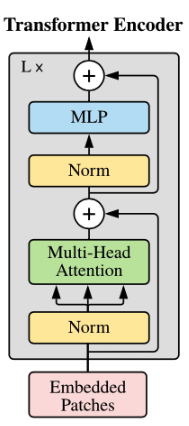

Transformer is the most popular architecture in many fields (computer vision, speech recognition, natural language processing, etc). The image above shows a typical transformer encoder.

In this problem, you will implement the same transformer encoder as shown in the image. Particularly you will implement multi-head attention and use provided functions to finish the missing parts in the encoder block.

Some things to note:
- Use LayerNorm for the Norm as shown in the figure above.
- FeedFoward is MLP in the figure.
- The gray rectangle illustrates the structure of EncoderBlock, and you only need to implement that.



In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import numpy as np

# hyperparameters
batch_size = 1
block_size = 32 # Maximum context length
device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_embd = 2 # emgedding dimension
n_head = 2 # number of heads in multi-head attention
# ------------
torch.manual_seed(568)

In [215]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size)
        self.query = nn.Linear(n_embd, head_size)
        self.value = nn.Linear(n_embd, head_size)

    def forward(self, x):
        # TODO: implement the single-head attention
        selfAttention = torch.bmm(self.query(x), self.key(x).transpose(-2, -1)) / (x.shape[2] ** 0.5)
        selfAttention = F.softmax(selfAttention, dim=-1)
        out = torch.bmm(selfAttention, self.value(x))
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])

    def forward(self, x):
        # TODO: implement the multi-head attention
        out = torch.cat([head(x) for head in self.heads], dim=-1)
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
        )

    def forward(self, x):
        return self.net(x)

class EncoderBlock(nn.Module):
    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads
        super().__init__()
        self.sa = MultiHeadAttention(n_head, n_embd // n_head)# TODO: initialize multi-head self attention
        self.mlp = FeedFoward(n_embd) # TODO: create feed forward network
        self.norm1 = nn.LayerNorm(n_head) # TODO: create layer norm
        self.norm2 = nn.LayerNorm(n_embd) # TODO: create layer norm


    # initialize the weights with an identity matrix to make sure we get the same weight everytime
    # it is used just for reproducing the results
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.eye_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.LayerNorm):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        # TODO: reference the provided figure of transformer encoder to implement the forward function
        out = x + self.sa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out

Initialize the encoder block.

In [216]:
encoder_block = EncoderBlock(n_embd, n_head).to(device)
encoder_block._initialize_weights()

Now, download data_p1.pt from Canvas and upload to your working directory.

In [217]:
data_dict_loaded = torch.load('data_p1.pt')
ans = data_dict_loaded['ans']
data = data_dict_loaded['data']

Forward pass the data to the encoder block and collect the reuslts into a list.

In [218]:
results = []
for datum in data:
    results.append(encoder_block(datum.to(device)).detach().cpu())

In [219]:
ans

[tensor([[[ 2.5860,  0.9419],
          [-1.4289,  1.6242],
          [ 2.8533, -1.4780],
          [ 0.7998,  2.6911],
          [-0.6340,  1.6984],
          [-1.7702,  2.3148],
          [-0.9737,  1.1272],
          [ 1.6078,  0.1909],
          [ 1.6731, -0.3200],
          [ 3.1005,  0.5838],
          [-1.2745,  1.0775],
          [ 2.7161, -0.6739],
          [ 2.8139,  0.6781],
          [ 0.6114, -0.4760],
          [-1.7369,  0.6209],
          [-1.5547,  1.4092],
          [ 0.6270, -0.4385],
          [ 3.5181, -0.6285],
          [-2.1928,  1.6743],
          [ 3.6704, -0.4864],
          [-1.0429,  1.2313],
          [-1.6441,  0.2750],
          [ 1.7162,  0.3108],
          [-1.1280,  1.5796],
          [ 0.2795,  1.3356],
          [-0.0457,  1.4466],
          [ 3.4281,  0.3123],
          [ 2.9692,  0.7618],
          [ 3.3695, -1.2879],
          [ 3.2384,  0.6489],
          [ 3.3479, -0.6007],
          [ 0.5302,  2.4495]]]),
 tensor([[[-1.0259,  0.6152],
       

In [220]:
results

[tensor([[[ 2.5860,  0.9419],
          [-1.4289,  1.6242],
          [ 2.8533, -1.4780],
          [ 0.7998,  2.6911],
          [-0.6340,  1.6984],
          [-1.7702,  2.3148],
          [-0.9737,  1.1272],
          [ 1.6078,  0.1909],
          [ 1.6731, -0.3200],
          [ 3.1005,  0.5838],
          [-1.2745,  1.0775],
          [ 2.7161, -0.6739],
          [ 2.8139,  0.6781],
          [ 0.6114, -0.4760],
          [-1.7369,  0.6209],
          [-1.5547,  1.4092],
          [ 0.6270, -0.4385],
          [ 3.5181, -0.6285],
          [-2.1928,  1.6743],
          [ 3.6704, -0.4864],
          [-1.0429,  1.2313],
          [-1.6441,  0.2750],
          [ 1.7162,  0.3108],
          [-1.1280,  1.5796],
          [ 0.2795,  1.3356],
          [-0.0457,  1.4466],
          [ 3.4281,  0.3123],
          [ 2.9692,  0.7618],
          [ 3.3695, -1.2879],
          [ 3.2384,  0.6489],
          [ 3.3479, -0.6007],
          [ 0.5302,  2.4495]]]),
 tensor([[[-1.0259,  0.6152],
       

Make sure your model produce the same result for every test case.

In [221]:
## Note, I changed the relative tolerance due to the fact that the values only ever go upto the 0.0001 place anyway.
## going further gives not use.

for i in range(len(data)):
    assert torch.allclose(results[i], ans[i], rtol=0.0001), f"Your implementation is wrong for the {i}-th example."
print('Pass')

Pass


Save your model to a file named **enc_block.pth** and include **enc_block.pth**  in your submission. We will test your encoder block with different test cases for you to get full credits.

In [222]:
PATH = './enc_block.pth'
torch.save(encoder_block.state_dict(), PATH)

In the decoder of transformer models, masking in self-attention is crucial for two primary reasons:

- Preventing Future Information Leakage: In tasks like language translation or text generation, the future tokens (words that come later in the sequence) should not influence the prediction of the current token. Masking ensures that while predicting a particular word, the model only has access to previously generated words and not to any future words. This is essential for the model to learn a proper language structure and generate coherent and contextually appropriate text.

- Maintaining Autoregressive Property: Transformers, especially in tasks like text generation, operate in an autoregressive manner, meaning they generate one part of the sequence at a time. By masking future tokens in the self-attention mechanism, the model respects this autoregressive nature, ensuring that each step of generation or translation is based solely on already known or generated information.

Please see https://arxiv.org/abs/1706.03762 for more details on Transformer.

**Question**: What should we modify if we want to implement masked attention head in transformer's decoder block? Please implement the masked attention by modifying your previous class Head.

In [223]:
class MaskedHead(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size)
        self.query = nn.Linear(n_embd, head_size)
        self.value = nn.Linear(n_embd, head_size)
        self.register_buffer('mask', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        # TODO: implement the single-head attention
        _, maskShape, size = x.shape
        selfAttention = torch.bmm(self.query(x), self.key(x).transpose(-2, -1)) / (size ** 0.5)
        selfAttention = selfAttention.masked_fill(self.mask[:maskShape, :maskShape] == 0, float('-inf'))
        selfAttention = F.softmax(selfAttention, dim=-1)
        out = torch.bmm(selfAttention, self.value(x))
        return out

In [224]:
encoder_block = EncoderBlock(n_embd, n_head).to(device)
encoder_block._initialize_weights()

data_dict_loaded = torch.load('data_p1.pt')
ans = data_dict_loaded['ans']
data = data_dict_loaded['data']

results = []
for datum in data:
    results.append(encoder_block(datum.to(device)).detach().cpu())

In [225]:
results

[tensor([[[ 2.5860,  0.9419],
          [-1.4289,  1.6242],
          [ 2.8533, -1.4780],
          [ 0.7998,  2.6911],
          [-0.6340,  1.6984],
          [-1.7702,  2.3148],
          [-0.9737,  1.1272],
          [ 1.6078,  0.1909],
          [ 1.6731, -0.3200],
          [ 3.1005,  0.5838],
          [-1.2745,  1.0775],
          [ 2.7161, -0.6739],
          [ 2.8139,  0.6781],
          [ 0.6114, -0.4760],
          [-1.7369,  0.6209],
          [-1.5547,  1.4092],
          [ 0.6270, -0.4385],
          [ 3.5181, -0.6285],
          [-2.1928,  1.6743],
          [ 3.6704, -0.4864],
          [-1.0429,  1.2313],
          [-1.6441,  0.2750],
          [ 1.7162,  0.3108],
          [-1.1280,  1.5796],
          [ 0.2795,  1.3356],
          [-0.0457,  1.4466],
          [ 3.4281,  0.3123],
          [ 2.9692,  0.7618],
          [ 3.3695, -1.2879],
          [ 3.2384,  0.6489],
          [ 3.3479, -0.6007],
          [ 0.5302,  2.4495]]]),
 tensor([[[-1.0259,  0.6152],
       

In [226]:
ans

[tensor([[[ 2.5860,  0.9419],
          [-1.4289,  1.6242],
          [ 2.8533, -1.4780],
          [ 0.7998,  2.6911],
          [-0.6340,  1.6984],
          [-1.7702,  2.3148],
          [-0.9737,  1.1272],
          [ 1.6078,  0.1909],
          [ 1.6731, -0.3200],
          [ 3.1005,  0.5838],
          [-1.2745,  1.0775],
          [ 2.7161, -0.6739],
          [ 2.8139,  0.6781],
          [ 0.6114, -0.4760],
          [-1.7369,  0.6209],
          [-1.5547,  1.4092],
          [ 0.6270, -0.4385],
          [ 3.5181, -0.6285],
          [-2.1928,  1.6743],
          [ 3.6704, -0.4864],
          [-1.0429,  1.2313],
          [-1.6441,  0.2750],
          [ 1.7162,  0.3108],
          [-1.1280,  1.5796],
          [ 0.2795,  1.3356],
          [-0.0457,  1.4466],
          [ 3.4281,  0.3123],
          [ 2.9692,  0.7618],
          [ 3.3695, -1.2879],
          [ 3.2384,  0.6489],
          [ 3.3479, -0.6007],
          [ 0.5302,  2.4495]]]),
 tensor([[[-1.0259,  0.6152],
       